# Le basi di ROOT

In questo notebbok andremo a vedere e analizzare il funzionamento base di alcune tra le più comuni classi di ROOT.

ROOT è un framework per l'analisi dati gestito in C++ (almeno in generale) in cui i vari elementi sono oggetti C++ e vanno gestiti come tali, solitamente si usa una gestione dinamica della memoria (puntatori) ma la gestione statica è comunque ammessa dal formalismo anche se a volte meno usata.

In questo file andremo a conoscre le classi
- TF1
- TCanvas
- TGraph e TGraphErrors

**!!! importante** 

Nel file seguente alcune istruzioni (import ROOT e %%cpp) sono usate solo e soltanto per far funzionare il codice sul notebook, non vanno usate nel framework!

*disclaimer*
nei commenti non ci sono le lettere accentate non perchè non le so usare ma perchè danno problemi in esecuzione


In [1]:
import ROOT 
#questo serve solo per il notebook

Welcome to JupyROOT 6.14/06


In [2]:
%%cpp 
//questo serve per usare ROOT e quindi C++ in questo ambiente ( e non pyROOT)
cout<<"ciao"<<endl;

ciao


## TF1

La classe TF1 gestisce le funzioni, con essa sono presenti una serie di funzioni già definite (e quindi comode da usare) come polinomi gaussiane ed esponenziali ma al contempo si possono usare funzione user-made cioè definite da noi.

In questa pagina [TF1 reference](https://root.cern.ch/doc/master/classTF1.html) possiamo trovare il suo costruttore, o meglio uno dei vari:

TF1 (const char *name, const char *formula, Double_t xmin, Double_t xmax, Option_t *option)

Come si può vedere la funzione richiede nome formula e il range (domninio) in cui essa è definita, facciamo alcuni esempi:


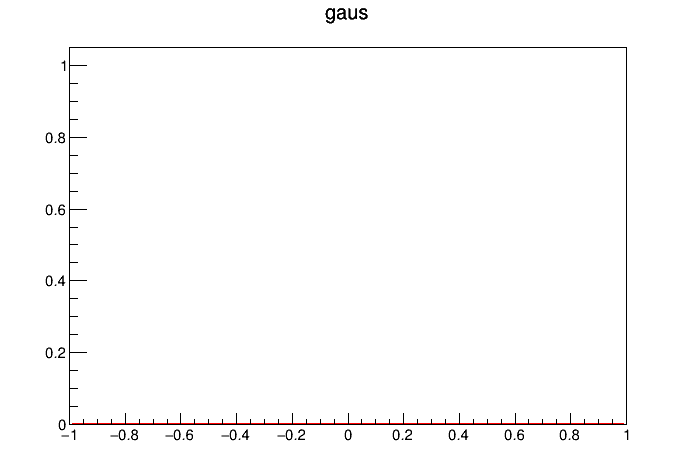

In [3]:
%%cpp
TCanvas c1; 
c1.Draw();
// qui sto creando un canvas per poter plottare le funzione, piu avanti vedremo nel dettaglio
//    il suo funzionamento, nel framework il canvas e  creato in automatico ma qui serve definirlo


//iniziamo creando una semplice gaussiana
TF1 *g= new TF1("g", "gaus", -1, 1);
g->Draw();


Come potete vedere la gaussiana viene plottata ma come una linea diritta, questo perchè bisogna settare i parametri (media costante e varianza), ogni funzione TF1 in particolare dipende da una serie di paramentri i quali possono essere determinati tramite fit o settati manualmente ad un certo valore, come qui sotto:

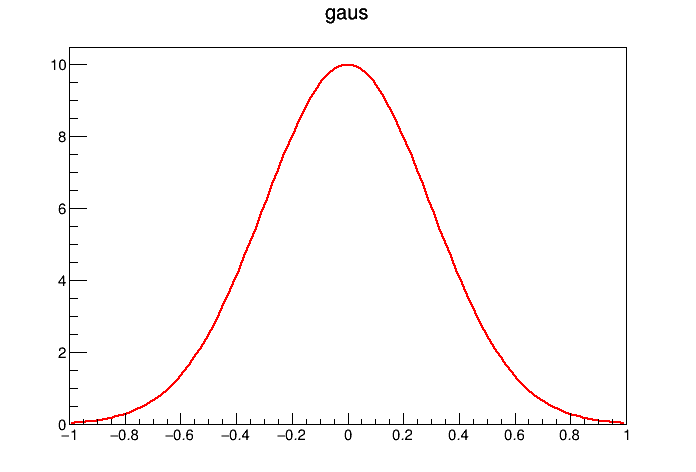

In [4]:
%%cpp
TCanvas c3; //normalmente le framework non serve ma qui si
c3.Draw();
g->SetParameter(0, 10);  //setto il parametro 0 ovvero la constante a 10
g->SetParameter(1, 0);   //setto il parametro 1 ovvero la media     a 1
g->SetParameter(2, 0.3); //setto il parametro 2 ovvero la varianza  a 0.3
g->Draw();


Allo stesso modo si possono definire molte altre funzioni predefinite usando al posto di gaus il nome specifico della funzione, tra queste vi sono
- expo -> un esponenziale
- poln -> dove al posto di n basta mettere il grado del polinomio desiderato (da 0 a 10 almeno)
- landau -> funzione di landau

Si possono come già detto definire funzioni user-made, in questo caso al posto di gaus tra " " va messa la formula dove i paramentri sono indicati dal loro numero tra parentesi quadre, ad esempio definiamo una parabola ( si potrebbe anche mettere direttamente pol2 ma facciamolo a mano)

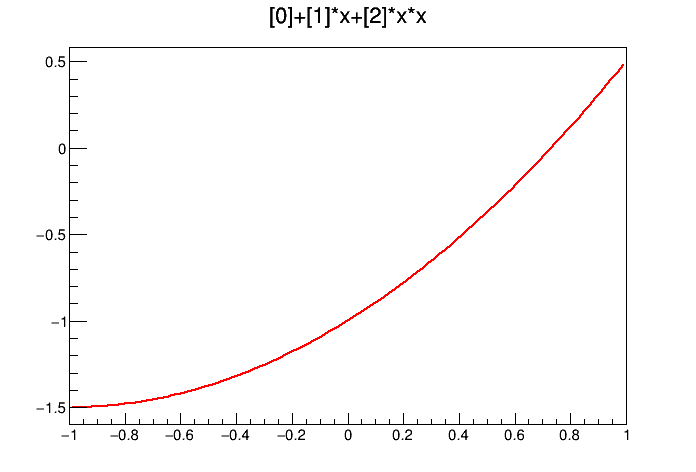

In [5]:
%%cpp
TCanvas cpar;
cpar.Draw();
TF1 *par= new TF1("par", "[0]+[1]*x+[2]*x*x", -1, 1); //creo la parabola con [0],[1],[2] i coefficienti
//settiamo i coefficienti
par->SetParameter(0, -1);
par->SetParameter(1, 1);
par->SetParameter(2, 0.5);
par->Draw();

Al link di referenza è presente una lista con tutti i metodi (funzioni c++ della classe) disponibili per il TF1, tra questi il più usato, (a parte Draw) è sicuramente Fit, il quale vedremo dopo.

## Classe TCanvas

I [TCanvas](https://root.cern.ch/doc/master/classTCanvas.html) sono l'ambiente in cui è possibile plottare i grafici, istrogrammi, dati , etc... 

I due costruttori più usati sono quello di default

TCanvas (Bool_t build=kTRUE)

e quello che crea un canvas di dimensione a nostra scelta

TCanvas (const char *name, const char *title, Int_t ww, Int_t wh)

In generale nel framework (non qui nel notebook purtroppo) quando si invoca il metodo Draw di un particolare oggetto viene creato un canvas di default in cui appare il disegno (e di solito si usa quello se non si vuole dare troppa importanza alla grafica)


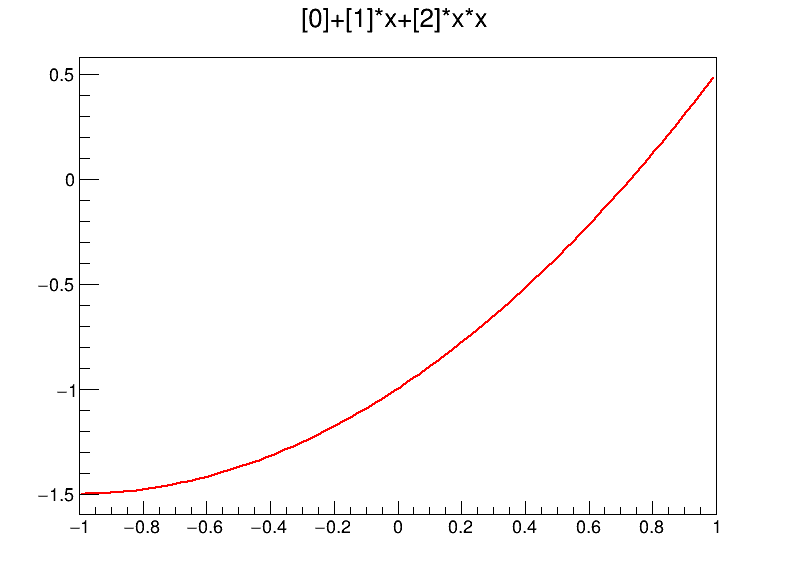

In [6]:
%%cpp
TCanvas *can1 = new TCanvas ("can1", "Canvas 1", 800, 600); //creo un canvas con nome Canvas 1 dimensione 800x600
can1->cd(); //ora che lo gestisco con il puntatore mi devo spostare nel canvas per poi disegnarvi dentro
par->Draw(); //uso una delle funzioni sopra per disegnare nel canvas
can1->Draw(); //disegno il canvas

Il metodo Draw viene ereditato e sovrascritto da tantissimi oggetti quindi è difficile dargli una collocazione gerarchica in ogni caso il funzionamento genrerico è questo:

Una volta invocato il metodo Draw esso disegna nell'ambiente in cui siamo l'oggeto, ad esempio quando lo chiamo per un Canvas esso metterà a schermo il canvas quando lo chiamo per una TF1 esso disegnarà la TF1 nel canvas corrente.

In generale il metodo Draw accetta una serie (lunga quanto volete tanto è un pointer) di opzioni, tra cui a seconda dell'oggetto vi sono cose come il colore della linea o lo spessore dei punti o lo stile in cui disegnare etc..

Ad esempio per le funzioni esempio l'opzione "same" per disegnare nello stesso canvas due funzioni ( senza verrebbe disegnata solo l'ultima in cui Draw viene chiamato)

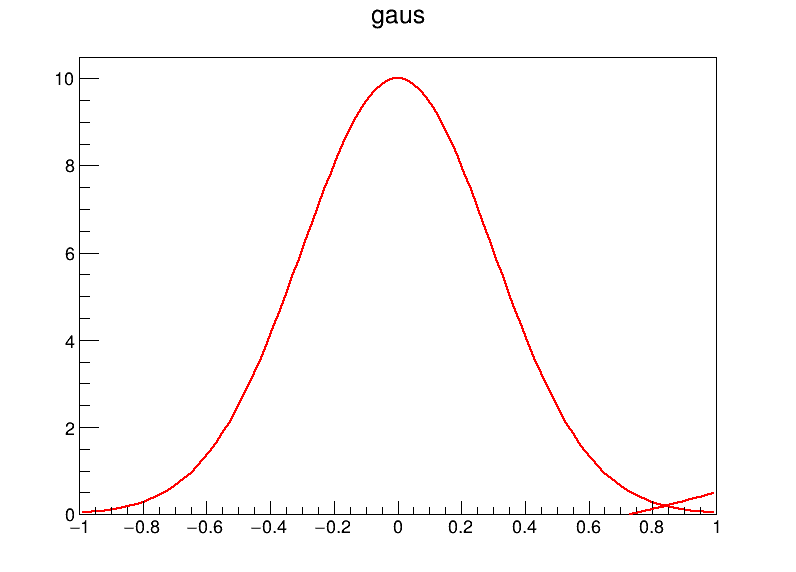

In [7]:
%%cpp
TCanvas *can2 = new TCanvas ("can2", "Canvas 2", 800, 600); //creo un canvas con nome Canvas 2 dimensione 800x600
can2->cd(); //ora che lo gestisco con il puntatore mi devo spostare nel canvas per poi disegnarvi dentro
g->Draw(); //uso una delle funzioni sopra per disegnare nel canvas
par->Draw("same");
can2->Draw(); //disegno il canvas

Come vedete ora entrambe sono state disegnate ma della parabola si vede solo una piccola parte, questo perchè nel canvas una volta chiamato Draw negli assi x e Y il range viene determinato sulla prima funzione e non viene poi più modificato (tranne che non lo si faccia manualmente)

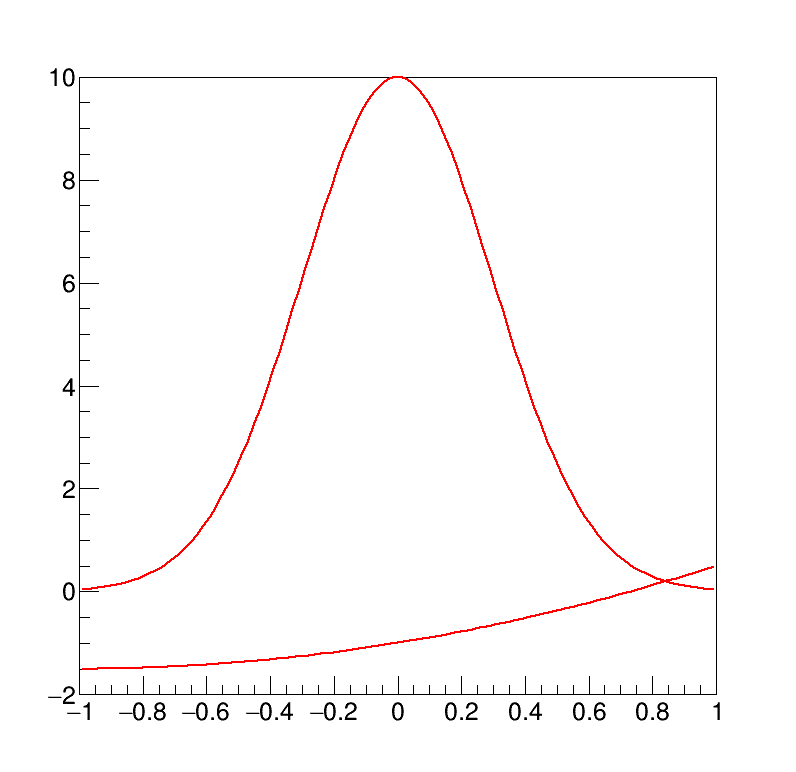

In [8]:
%%cpp
TCanvas *can3 = new TCanvas ("can3", "Canvas 3", 800, 800); //creo un canvas con nome Canvas 2 dimensione 800x800
can3->cd(); //ora che lo gestisco con il puntatore mi devo spostare nel canvas per poi disegnarvi dentro
can3->DrawFrame(-1, -2,1,10 ); //setto il range del canvas 
g->Draw("same"); //uso una delle funzioni sopra per disegnare nel canvas
par->Draw("same");
can3->Draw();

In questo modo riesco a sistemare il range abbastanza facilmente ma questo metodo di fare le cose è abbastanza deprecato, è più conveninte settare direttamente il range della funzione usando i suoi assi (vedremo come fare quando useremo i TF1)

Un Canvas in verità non è un oggetto così semplice, in verità al suo interno le cose vengono disegnate in un frame, questo meccanismo (complicato quindi non andremo a fondo) permette di dividere i canvas in zone minori chiamate Tpad nei quali possiamo plottare i grafici, permettendo così di disegnare più grafici uno accanto all'altro

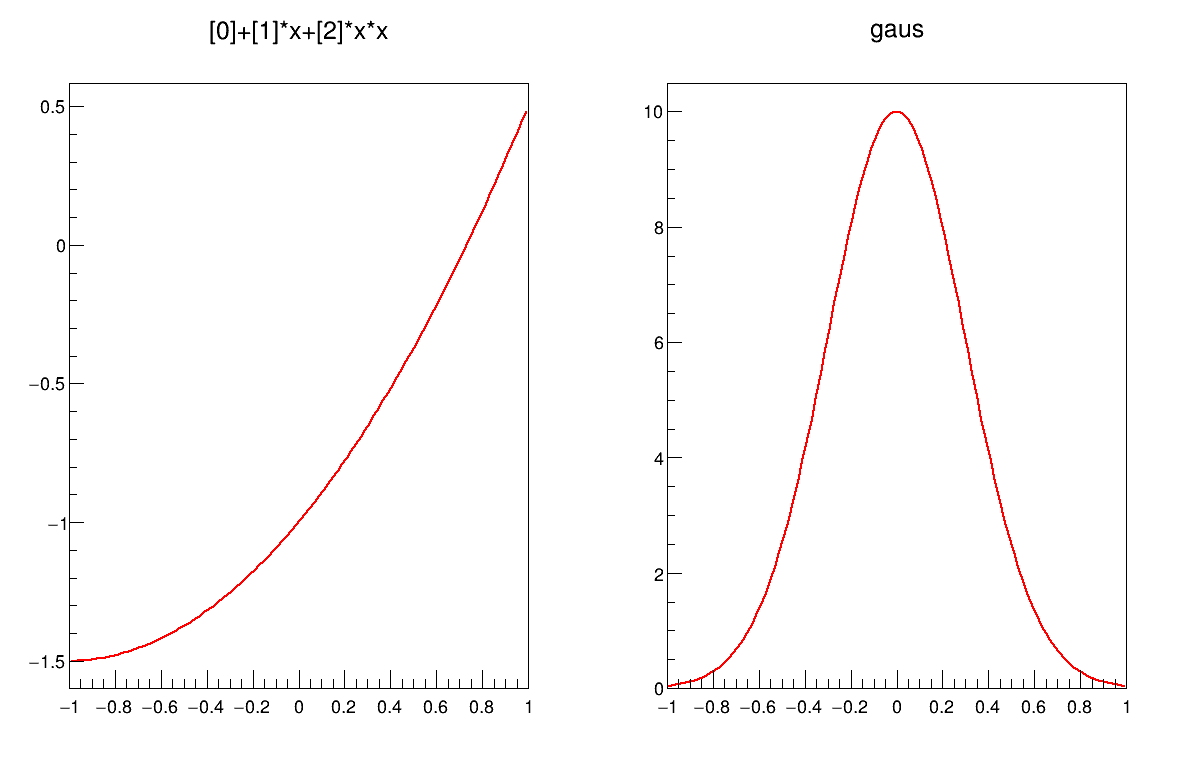

In [9]:
%%cpp
TCanvas *can4 = new TCanvas ("can4", "Canvas 4", 1200, 800); 
//divido il canvas i 1 orizzontalmente e 2 veritcalmente
can4->Divide (2,1);

//gli ambienti sono numerati in ordine crescente
can4->cd(1); //mi sposto nel primo Tpad
par->Draw(); //disegno la parabola

can4->cd(2); //mi sposto nel secondo Tpad
g->Draw(); //disegno la gaussiana

can4->Draw();

Per poter fare cose più elaborate (ad esempio plottare la gaussiana in scala logaritmica) si può assegnare una sotto-parte del canvas a un Tpad virtuale con cui modificare la zona, ad esempio:

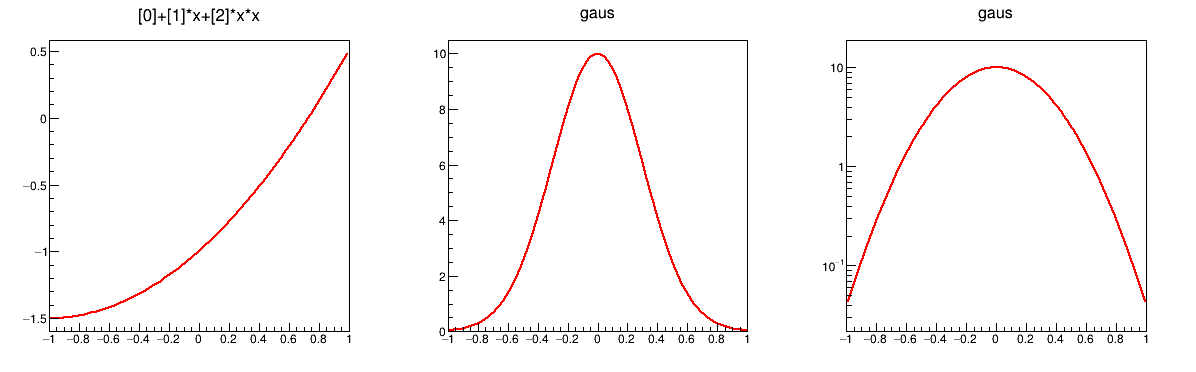

In [10]:
%%cpp
TCanvas *can5 = new TCanvas ("can5", "Canvas 5", 1200, 400); 
//divido il canvas i 1 orizzontalmente e 2 veritcalmente
can5->Divide (3,1);

//gli ambienti sono numerati in ordine crescente
can5->cd(1); //mi sposto nel primo Tpad
par->Draw(); //disegno la parabola

can5->cd(2); //mi sposto nel secondo Tpad
g->Draw(); //disegno la gaussiana

can5->cd(3); //mi sposto nel terzo Tpad
TVirtualPad *c_1 = can5->cd(3); //creo un Tpad virtuale a cui assegno la zona 3 del canvas
c_1->SetLogy(); //setto la scala logaritmica
g->Draw(); //disegno la gaussiana (dovrebbe essere una parabola a livello visivo)

can5->Draw();

## TGraph e TgraphErrors

I Tgraph sono una classe che si occupa di graficare (in una o più dimensioni) array di dati, sostanzialmente permettono date delle coppie di punti (coordinate) di disegnarle a schermo, per avere grafici in dimensione più alta vi sono poi delle classi anaologhe che anzichè coppie richiedono terne quadruple etc...

Per entrambe le classi vi sono una serie di costruttori che possono essere usati per ottenere i dati a seconda della situazione in cui ci si trova:

Per i [Tgraph](https://root.cern.ch/doc/master/classTGraph.html) ci sono:
- TGraph (Int_t n, const Float_t *x, const Float_t *y) più gli analogi int e double per importare da array
- TGraph (const TH1 *h) per importare da un istogramma
- TGraph (const char *filename, const char *format="%lg %lg", Option_t *option="") per importare da file

Per i [TgraphError](https://root.cern.ch/doc/master/classTGraphErrors.html) ci sono:
- TGraphErrors (Int_t n, const Double_t *x, const Double_t *y, const Double_t *ex=0, const Double_t *ey=0)
- TGraphErrors (const TH1 *h)
- TGraphErrors (const char *filename, const char *format="%lg %lg %lg %lg", Option_t *option="")


Vediamo alcune funzioni di esempio:

In [11]:
%%cpp
TCanvas *tcan = new TCanvas ("tcan", "Canvas graph 1", 800, 400);
tcan->Divide(2,1);

const int dim=50;
double x[dim], y[dim], ex[dim], ey[dim];
for (int i=0;i<dim;i++) {
    x[i] = i*0.1;
    y[i] = 100*exp(-x[i]*x[i]);
    ex[i]=0.001;
    ey[i]=sqrt(y[i]);
}


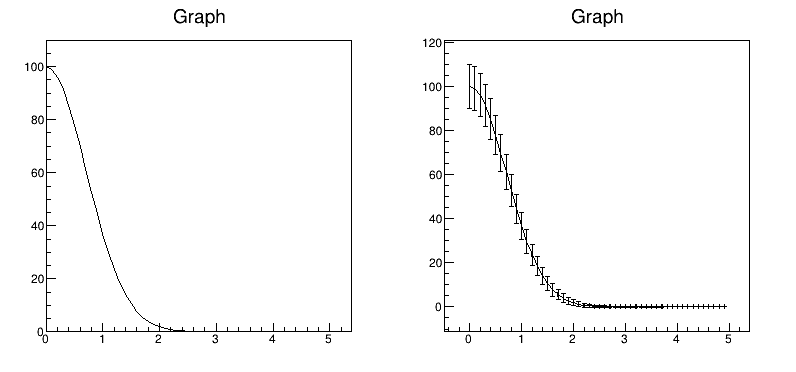

In [12]:
%%cpp

TGraph* gr = new TGraph(dim ,x,y); //uso il costruttore con gli array
TGraphErrors* grerr = new TGraphErrors(dim ,x,y, ex, ey); //uso il costruttore con gli array

tcan->cd(1);
gr->Draw();

tcan->cd(2);
grerr->Draw();

tcan->Draw();


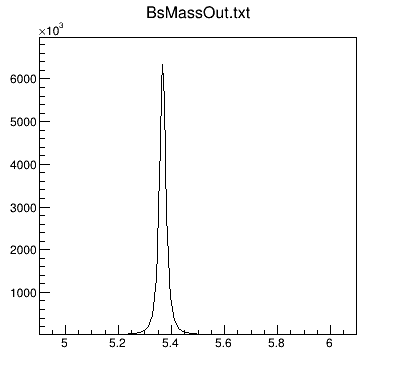

In [13]:
%%cpp
TGraph* gr2 = new TGraph("BsMassOut.txt"); //uso il costruttore con file

TCanvas *tcan2 = new TCanvas ("tcan2", "Canvas", 400, 400);
tcan2->cd();
gr2->Draw();
tcan2->Draw();

Come potete vedere più che un grafico questo sembrerebbe un istrogramma (in verità zoomando si vede che è un alinea continua) questo avviene poichè quando il metodo Draw è invocato vi sono alcune impostazioni "di default" che a seconda della situazione possono far apparire in modo diverso il risultato a schermo, più avanti vedremo nel dettaglio i concetti base della parte grafica ma in generale c'è abbastanza possibilità di personalizzare l'output usando dei comandi appositi:
- quando si chiama Draw si posso aggiungere opzioni specifiche
- vi sono comandi che modificano lo stile output prima di Draw
Ad esempio si può ottenere:

In [14]:
%%cpp
TCanvas *tcan3 = new TCanvas ("tcan3", "Canvas", 1200, 800);
TGraph* gr3;
tcan3->Divide(3,2);

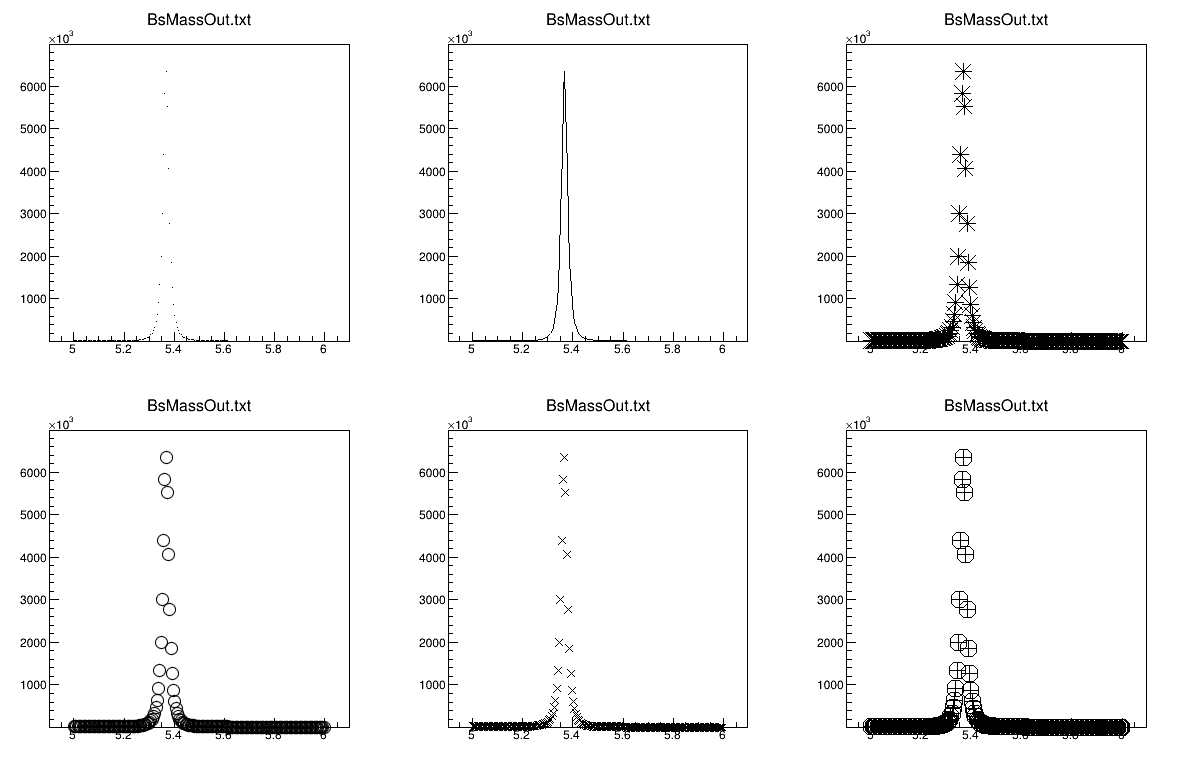

In [15]:
%%cpp
tcan3->cd(1);
//questo disegna assi e punti ma i punti sono poco visibili
gr3 = new TGraph("BsMassOut.txt"); //uso il costruttore con file
gr3->Draw("AP");

tcan3->cd(2);
//questo disegna assi e punti uniti da linea 
gr3 = new TGraph("BsMassOut.txt"); //uso il costruttore con file
gr3->Draw("AL");

tcan3->cd(3);
gr3 = new TGraph("BsMassOut.txt"); //uso il costruttore con file
gr3->SetMarkerSize(2); //modifica la dimensione del punto
gr3->SetMarkerStyle(3); //modifica lo stile del punto (4 sono i cerchi 3 le * 5 le x)
gr3->Draw("AP");

tcan3->cd(4);
gr3 = new TGraph("BsMassOut.txt"); //uso il costruttore con file
gr3->SetMarkerSize(1.5); //modifica la dimensione del punto
gr3->SetMarkerStyle(4); //modifica lo stile del punto (4 sono i cerchi 3 le * 5 le x)
gr3->Draw("AP");

tcan3->cd(5);
gr3 = new TGraph("BsMassOut.txt"); //uso il costruttore con file
gr3->SetMarkerSize(1); //modifica la dimensione del punto
gr3->SetMarkerStyle(5); //modifica lo stile del punto (4 sono i cerchi 3 le * 5 le x)
gr3->Draw("AP");

tcan3->cd(6);
gr3 = new TGraph("BsMassOut.txt"); //uso il costruttore con file
gr3->SetMarkerSize(2); //modifica la dimensione del punto
gr3->SetMarkerStyle(kOctagonCross); //al posto del numero posso mettere i marker (vedremo dopo)
gr3->Draw("AP");

tcan3->Draw();

## Fit
Combinando TF1 e TGraph possiamo ora fare analisi statistica ovvero definire una funzione che descriva il nostro set di dati e fittarla per ottenre informazioni, dentro la classe TGraph ( e TGraphErrors= c'è un metodo chiamato Fit il quale esegue appunto il fit della funzione sui dati ritornando anche i parametri statistici a cui siamo interessati, ad esempio:

In [16]:
%%cpp
TCanvas *fcan =new TCanvas ("fcan", "fit canvas", 600,600);
fcan->cd();
TGraph *BsMass = new TGraph("BsMassOut.txt"); //uso il costruttore con file
TF1 *ga=new TF1 ("ga", "gaus", 5.25, 5.45); //creo una guassiana per fittare


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  2.15822e+12
NDf                       =           37
Edm                       =  8.99599e-06
NCalls                    =           94
Constant                  =  5.89678e+06   +/-   141692      
Mean                      =      5.36698   +/-   0.000361029 
Sigma                     =    0.0137413   +/-   0.000418971  	 (limited)


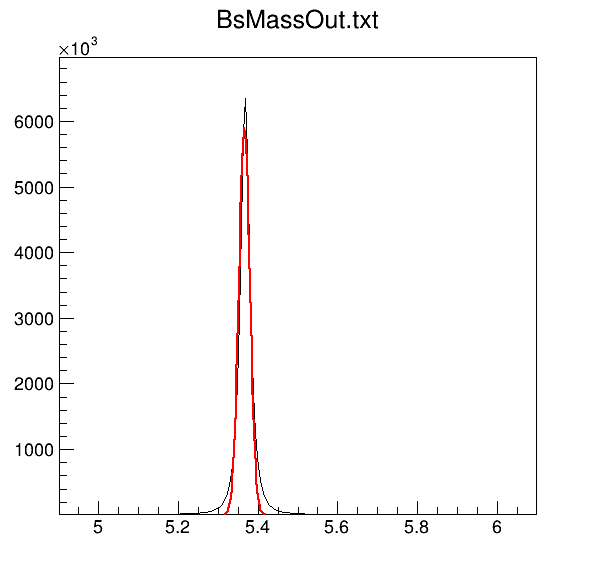

In [17]:
%%cpp
BsMass->Fit("ga", "R"); //a fit do la funzione con cui fittare e il comando R che impone il fit nel range in cui
                        // la funzione e definita, altrimenti lo farebbe su tutto il grafico
    
BsMass->Draw();
fcan->Draw();

Come potete vedere l'andamento gaussiano più o meno è osservabile ma il chi quadro è altissimo ( anche se in questo caso non ha senso considerarlo) e sia il picco che le code sono fittati male, in questi casi vi sono sostanzialemnte due opzioni:
- ridurre il range in cui la funzione è definita in modo da fittare solo all'intorno del picco (se si è interessati al centro questo è meglio
- fittare con la somma di più funzioni, ad esempio due gaussiane, in questo caso però bisogna adottare alcuni accorgiemnti:
    - bisogna o definire a mano la funzione oppure ricordarsi di "shiftare" i parametri delle funzioni
    - è opportuno dare un valore ai parametri prima di fittare sennò il fit rischia di non convergere, per fare ciò esiste il metodo SetParameter(npar, parvalue) che setta il parametro npar a parvalue

In [18]:
%%cpp
TCanvas *fcan2 =new TCanvas ("fcan2", "fit canvas", 1200,400);
fcan2->Divide(3,1);
TF1 *ga_redo=new TF1 ("ga_redo", "gaus", 5.35, 5.38); //creo una guassiana con range piu corto
TF1 *gasum  =new TF1 ("gasum"  , "gaus(0)+gaus(3)", 5.25, 5.45); //somma di due gaussiane
TF1 *gasum2  =new TF1 ("gasum2" , "gaus(0)+gaus(3)", 5.3, 5.4); //somma di due gaussiane


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  3.28806e+10
NDf                       =            3
Edm                       =  1.17979e-06
NCalls                    =          101
Constant                  =  6.26648e+06   +/-   71796.9     
Mean                      =      5.36681   +/-   0.00017183  
Sigma                     =    0.0115414   +/-   0.000253459  	 (limited)

****************************************
Minimizer is Minuit / Migrad
Chi2                      =  1.71539e+14
NDf                       =           34
Edm                       =            0
NCalls                    =          299
p0                        = -3.70447e+11   +/-   3.17656e+06 
p1                        =            0   +/-   3.17656e+06 
p2                        =            0   +/-   3.17656e+06 
p3                        =            0   +/-   3.17656e+06 
p4                        =            0   +/-   3.17656e+06 
p5                    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: fcan2
Warning in <Fit>: Abnormal termination of minimization.


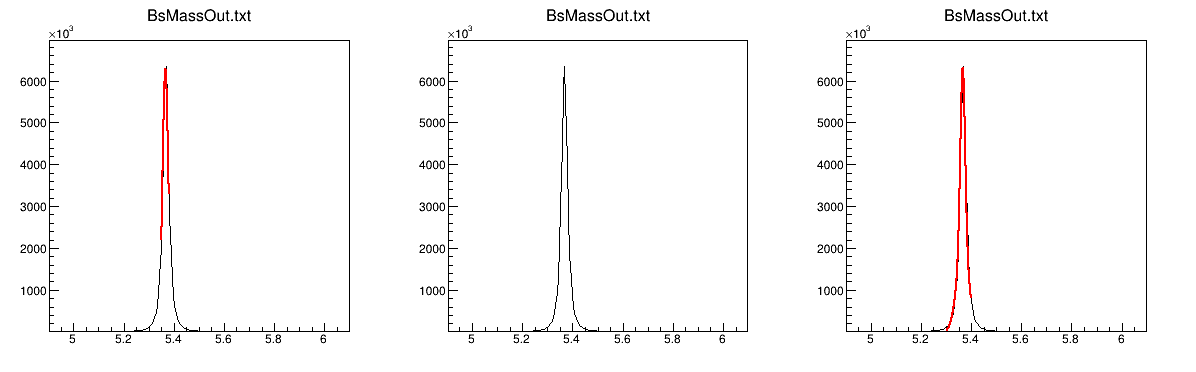

In [19]:
%%cpp
//qui ridefinisco ogni volta il graph senno le funzioni si sovrappongono in output
fcan2 =new TCanvas ("fcan2", "fit canvas", 1200,400);
fcan2->Divide(3,1);

fcan2->cd(1);
BsMass = new TGraph("BsMassOut.txt"); //uso il costruttore con file
BsMass->Fit("ga_redo", "R");
BsMass->Draw();


fcan2->cd(2);
//non mi aspetto che questo fit converga
BsMass = new TGraph("BsMassOut.txt"); //uso il costruttore con file
BsMass->Fit("gasum", "R");
BsMass->Draw();

fcan2->cd(3);
BsMass = new TGraph("BsMassOut.txt"); //uso il costruttore con file
//diamo valori iniziali alla gaussiana sperando che converga
gasum2->SetParameter(0, 5.5e+06 );
gasum2->SetParameter(1, 5.36698);
gasum2->SetParameter(2, 0.01);
gasum2->SetParameter(3, 2e+06 );
gasum2->SetParameter(4, 5.36698);
gasum2->SetParameter(5, 0.1);
BsMass->Fit("gasum2", "R");
BsMass->Draw();


fcan2->Draw();


In questo esempio è evindente come sia molto importante il valore iniziale che viene dato ai parametri, è necessario però fare alcuni commenti:

Il valore del chi quadro spaventosamente alto è dovuto alla statistica associata infatti siamo a ordini molto alti di grandezza e il binning è troppo piccolo per essere sufficinete a descrivere i dati ( si dovrebbe fittare a likelihhod il singolo dato-> ROOFIT) e il fit a due gaussiane non sembra migliorare la cosa ma questo è poichè nonostante gli accorgimenti non risce a convergere, vi sono infatti troppi pochi bin per ottenere un fit di buon livello a questa statistica.

## Painters 

Quando si usa un TGraph al suo interno vi è un [TGraphPainter](https://root.cern.ch/doc/master/classTGraphPainter.html)
, questa classe gestisce le opzioni grafiche concui il TGraph viene portato a schermo e al suo grazie a lui si possono personalizzare i TGraph.

I TGraph quindi si possono personalizzare usando le varie opzioni al momento del Draw (vedi sopra per le più comuni o alla pagina per la lista completa) oppure usando i comendi SetMarkerStyle e SetMarkerSize (come visto sopra, il comando SetMarkerStyle accetta un numero corrispondente allo stile oppure il nume di un [MarkerStyler](https://root.cern.ch/doc/master/TAttMarker_8h.html#a8e27ac630ae56999f0e087dcfbca0619a14f4ef288fcd3df029866f61d48af259) come ad esempio: kFullCross, kFullCircle kDot eccetera.


I TF1 non hanno un Painter vero e proprio ma possiedono ereditano da [TAttLine](https://root.cern.ch/doc/master/classTAttLine.html); grazie a questa classe si possono personalizzare (tra le varie cose) colore stile e larghezza delle linee con i metodi appositi:

- SetLineColor e SetLineColorAlpha impostano colore e colore + trasparenza
- SetLineStyle imposta lo stile 
- SetLineWidth imposta la larghezza

Per il metodo SetLineColor i colori disponibili sono da 0 a 50 (quelli di default) e gli [Color](https://root.cern.ch/doc/master/Rtypes_8h.html#ac31db05c6cb5891c704eae374f6926a8aab48c32302f7159d81e081c41dc2d3d2) già predefiniti; in modo analogo SetLineStyle accetta i numeri da 1 a 10, alcuni dei quali hanno un nome (KDashed, kDotted)

Abbiamo già visto come implementare le opzioni del Painter dei TGraph, facciamo quindi un esempio per TAttLine:


In [20]:
%%cpp
TCanvas *pcan =new TCanvas ("pcan", "line canvas", 1200,800);
pcan->Divide(3,2);
TF1 *s;


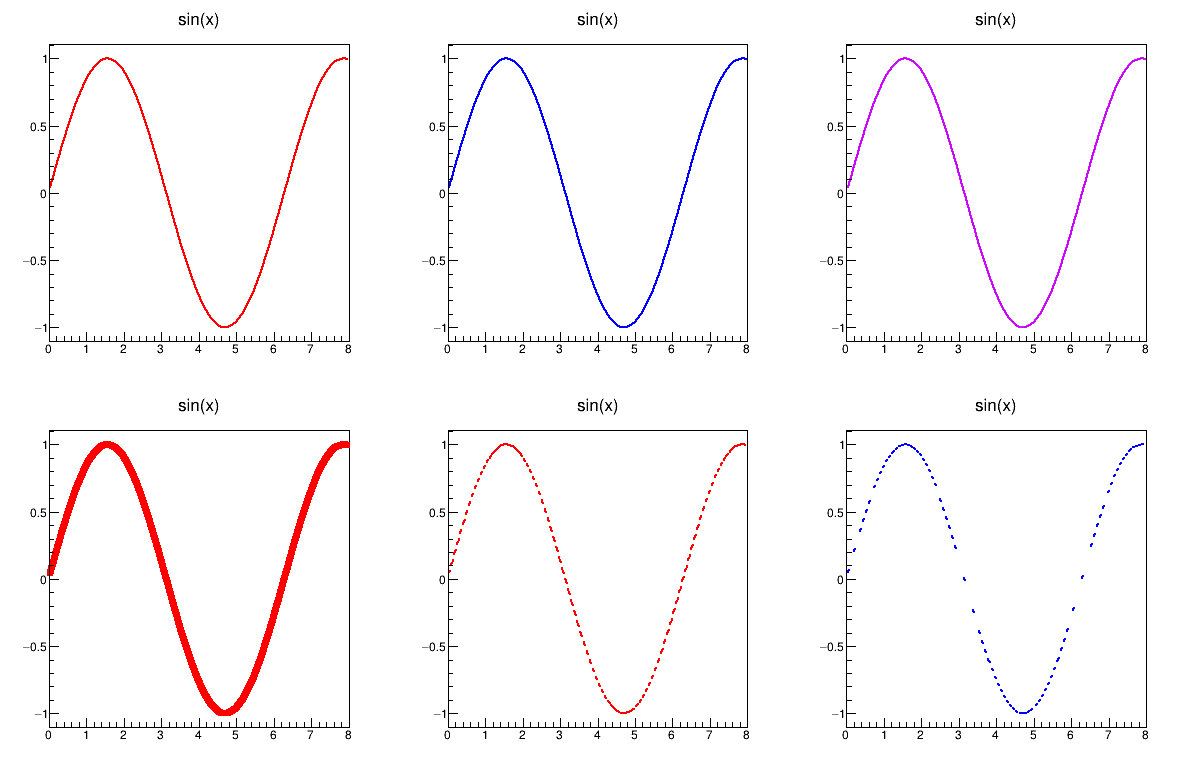

In [30]:
%%cpp

pcan->cd(1);
s=new TF1("s", "sin(x)", 0, 8);
s->Draw(); //disegno standard

pcan->cd(2);
s=new TF1("s", "sin(x)", 0, 8);
s->SetLineColor(4); //cambiamo colore
s->Draw(); //disegno standard

pcan->cd(3);
s=new TF1("s", "sin(x)", 0, 8);
s->SetLineColorAlpha(kViolet, 0.9); //cambiamo colore e mettimao trasparenza
s->Draw(); //disegno standard

pcan->cd(4);
s=new TF1("s", "sin(x)", 0, 8);
s->SetLineWidth(6); //facciamo una linea molto spessa
s->Draw(); //disegno standard

pcan->cd(5);
s=new TF1("s", "sin(x)", 0, 8);
s->SetLineStyle(6); //cambiamo stile
s->Draw(); //disegno standard

pcan->cd(6);
s=new TF1("s", "sin(x)", 0, 8);
//cambiamo tutto
s->SetLineStyle(kDashed); 
s->SetLineColor(kBlue); 
s->SetLineWidth(2); 
s->Draw();

pcan->Draw(); //disegno standard


